# Практическая работа № 8

## Используя Market_Basket_Optimisation.csv

In [15]:
!pip3 install apriori_python
!pip3 install apyori
!pip3 install efficient_apriori
!pip3 install fpgrowth_py

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import apriori_python
import apyori
import efficient_apriori
from fpgrowth_py import fpgrowth

In [17]:
market_data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

market_data = pd.DataFrame(market_data)

market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [18]:
# Подсчет частоты встречаемости каждого товара
market_data.stack().value_counts()

mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Length: 120, dtype: int64

In [19]:
market_data.stack().value_counts(normalize=True)

mineral water    0.060893
eggs             0.045908
spaghetti        0.044478
french fries     0.043660
chocolate        0.041889
                   ...   
bramble          0.000477
cream            0.000238
napkins          0.000170
water spray      0.000102
 asparagus       0.000034
Length: 120, dtype: float64

<Axes: >

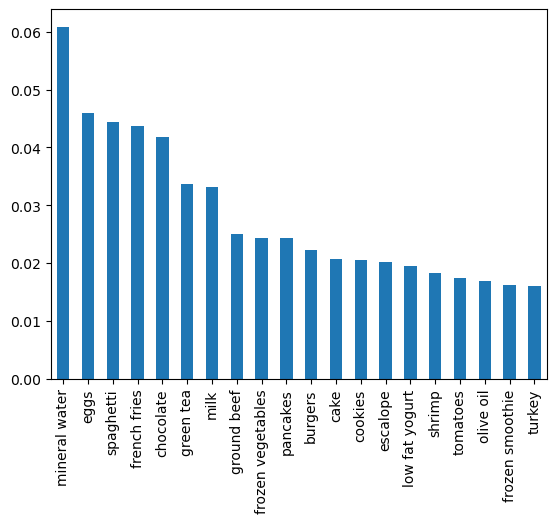

In [20]:
# Выбор 20 наиболее популярных - относительная
market_data.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<Axes: >

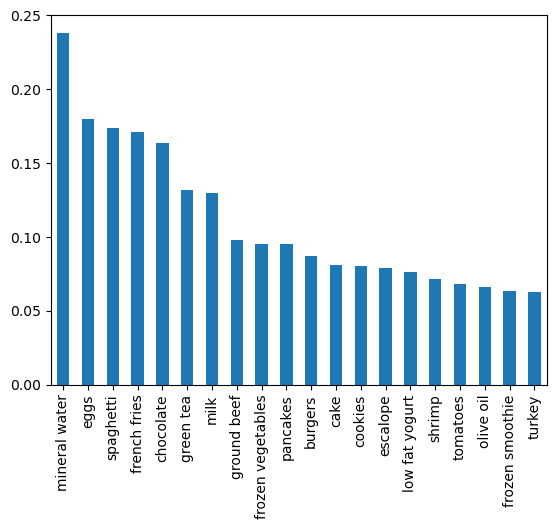

In [21]:
# Выбор 20 наиболее популярных - фактическая
market_data.stack().value_counts().head(20).apply(
    lambda item: item / market_data.shape[0]).plot(kind='bar')

In [22]:
transations = []
for i in range(market_data.shape[0]):
    row = market_data.iloc[i].dropna().to_list()
    transations.append(row)


print(transations[0][0])
print(transations[0])

min_sup = 0.05
min_conf = 0.1

shrimp
['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In [23]:
# Применение алгоритма Apriori с использованием apriori_python
t = []
start = time.perf_counter()

t1, rules = apriori_python.apriori(transations, minSup=min_sup, minConf=min_conf)

time1 = time.perf_counter() - start
t.append(time1)
rules

[[{'mineral water'}, {'eggs'}, 0.21364653243847875],
 [{'mineral water'}, {'chocolate'}, 0.220917225950783],
 [{'mineral water'}, {'spaghetti'}, 0.2505592841163311],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311]]

In [24]:
# Применение алгоритма Apriori с использованием apyori
start = time.perf_counter()

rules = apyori.apriori(transactions=transations, 
                       min_support = min_sup,
                       min_confidence = min_conf,
                       min_lift = 1.0001
                       )

results = list(rules)

time2 = (time.perf_counter() - start)
t.append(time2)

for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print("Support: {0}; Confidence: {1}; Lift: {2}".format(result[1], subset[2], subset[3]))
        print()

frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05265964538061592; Confidence: 0.3213995117982099; Lift: 1.3483320682317521

frozenset({'mineral water'}) frozenset({'chocolate'})
Support: 0.05265964538061592; Confidence: 0.220917225950783; Lift: 1.348332068231752

frozenset({'eggs'}) frozenset({'mineral water'})
Support: 0.05092654312758299; Confidence: 0.28338278931750743; Lift: 1.188844688294532

frozenset({'mineral water'}) frozenset({'eggs'})
Support: 0.05092654312758299; Confidence: 0.21364653243847875; Lift: 1.188844688294532

frozenset({'mineral water'}) frozenset({'spaghetti'})
Support: 0.05972536995067324; Confidence: 0.2505592841163311; Lift: 1.4390851379453289

frozenset({'spaghetti'}) frozenset({'mineral water'})
Support: 0.05972536995067324; Confidence: 0.3430321592649311; Lift: 1.4390851379453289



In [25]:
# Применение алгоритма Apriori с использованием efficient_apriori
start = time.perf_counter()
itemsets, rules = efficient_apriori.apriori(transations, min_support=min_sup, min_confidence=min_conf)
time3 = time.perf_counter() - start
t.append(time3)
for i in range(len(rules)):
    print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.348, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.348, conv: 1.122)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.439, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.439, conv: 1.102)


In [26]:
# Применение алгоритма FP-Growth с использованием fpgrowth_py
start = time.perf_counter()
itemsets, rules = fpgrowth(transations, minSupRatio=min_sup, minConf=min_conf)
time4 = time.perf_counter() - start
t.append(time4)

for i in range(len(rules)):
    print(rules[i])

[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'mineral water'}, {'chocolate'}, 0.220917225950783]
[{'mineral water'}, {'spaghetti'}, 0.2505592841163311]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'mineral water'}, {'eggs'}, 0.21364653243847875]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]


Время выполнения apriori_python:  0.6610771000005116 

Время выполнения apyori:  0.01089999999931024 

Время выполнения efficient_apriori:  0.008626400000139256 

Время выполнения fpgrowth:  0.13080819999959203 



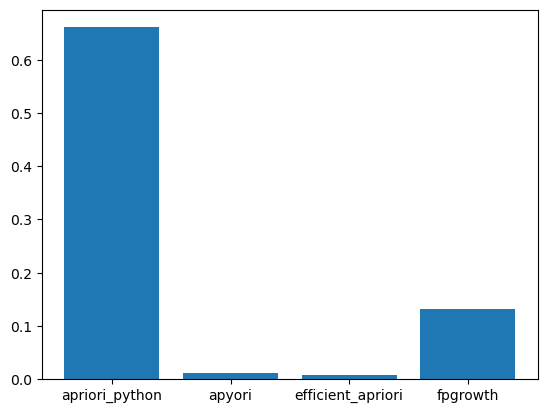

In [27]:
print('Время выполнения apriori_python: ', t[0], '\n')
print('Время выполнения apyori: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori_python','apyori','efficient_apriori','fpgrowth'],t)
plt.show()